In [ ]:
# библиотека numpy
import numpy as np
# фреймворк tensorflow
import tensorflow as tf

In [ ]:
# загрузка файла
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d ibrahimserouis99/one-piece-image-classifier

 99% 2.52G/2.53G [00:39<00:00, 87.0MB/s]
100% 2.53G/2.53G [00:39<00:00, 68.6MB/s]


In [ ]:
!kaggle datasets list -s one-piece-image-classifier

ref                                          title                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------  --------------------------  ----  -------------------  -------------  ---------  ---------------  
ibrahimserouis99/one-piece-image-classifier  One Piece image classifier   3GB  2022-05-28 01:45:38            425         25  1.0              


In [ ]:
!unzip one-piece-image-classifier.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Data/Mihawk/201.png  
  inflating: Data/Data/Mihawk/201.png_inverted.png  
  inflating: Data/Data/Mihawk/202.png  
  inflating: Data/Data/Mihawk/202.png_inverted.png  
  inflating: Data/Data/Mihawk/203.png  
  inflating: Data/Data/Mihawk/203.png_inverted.png  
  inflating: Data/Data/Mihawk/204.png  
  inflating: Data/Data/Mihawk/204.png_inverted.png  
  inflating: Data/Data/Mihawk/205.png  
  inflating: Data/Data/Mihawk/205.png_inverted.png  
  inflating: Data/Data/Mihawk/206.png  
  inflating: Data/Data/Mihawk/206.png_inverted.png  
  inflating: Data/Data/Mihawk/207.png  
  inflating: Data/Data/Mihawk/207.png_inverted.png  
  inflating: Data/Data/Mihawk/208.png  
  inflating: Data/Data/Mihawk/208.png_inverted.png  
  inflating: Data/Data/Mihawk/209.png  
  inflating: Data/Data/Mihawk/209.png_inverted.png  
  inflating: Data/Data/Mihawk/21.png  
  inflating: Data/Data/Mihawk/21.png_inverted.png  
  inflating: Data/Dat

In [ ]:
!ls Data/Data/

Ace	Brook	 Crocodile  Jinbei    Law    Mihawk  Rayleigh  Sanji   Usopp
Akainu	Chopper  Franky     Kurohige  Luffy  Nami    Robin     Shanks  Zoro


In [ ]:
import pathlib
data_dir = pathlib.Path('Data/Data/')
data_dir

PosixPath('Data/Data')

In [ ]:
import PIL
import PIL.Image

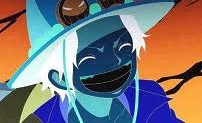

In [ ]:
ace_kun = list(data_dir.glob('Ace/*'))
PIL.Image.open(str(ace_kun[2]))

In [ ]:
luffy_count = len(list(data_dir.glob('Luffy/*')))
luffy_count

654

In [ ]:
# convert images to np.arrays

Ace = list(data_dir.glob('Ace/*'))
Ace_array = []

for i in range(1, len(Ace)):
  j = PIL.Image.open(Ace[i])
  j = j.resize((200,200))
  j = np.array(j)
  
  if j.shape==(200,200,3):
    Ace_array = np.append(Ace_array, j)
print(Ace_array.shape)

(57960000,)


TypeError: ignored

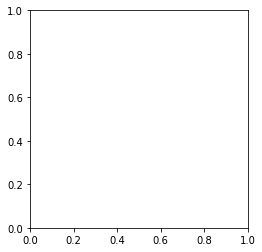

In [ ]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(Ace_array, interpolation='nearest')
plt.show()

# **tensor image**
shape=(N, H, W, C)

* N — batch size (number of images per batch)
* H — height of the image
* W — width of the image
* C — number of channels (usually uses 3 channels for RGB)

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# 80% of dataset for training
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11086 files belonging to 17 classes.
Using 8869 files for training.


In [ ]:
# 20% of dataset for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11086 files belonging to 17 classes.
Using 2217 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Ace', 'Akainu', 'Brook', 'Chopper', 'Crocodile', 'Franky', 'Jinbei', 'Kurohige', 'Law', 'Luffy', 'Mihawk', 'Nami', 'Robin', 'Sanji', 'Shanks', 'Usopp', 'Zoro']


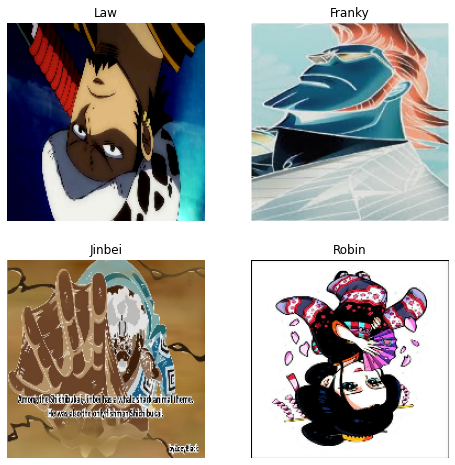

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 17

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
278/278 [==============================] - 393s 1s/step - loss: 2.6937 - accuracy: 0.1315 - val_loss: 2.5138 - val_accuracy: 0.2260
Epoch 2/3
278/278 [==============================] - 391s 1s/step - loss: 2.1005 - accuracy: 0.3522 - val_loss: 2.2382 - val_accuracy: 0.3225
Epoch 3/3
278/278 [==============================] - 388s 1s/step - loss: 1.4532 - accuracy: 0.5533 - val_loss: 2.2121 - val_accuracy: 0.4041
